In [2]:
#Wymagania
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import math
import matplotlib
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [42]:

#Ładowanie danych
path = r'C:\Users\Wietczak\Desktop\Dane do wysłania\public-dataset.json'
data_public = pd.read_json(path)
data_public = pd.DataFrame(data_public)
data_public
path1 = r'C:\Users\Wietczak\Desktop\Dane do wysłania\hidden-Xs.json'
data_hidden = pd.read_json(path1)
data_hidden = pd.DataFrame(data_hidden)
data_hidden

,rodzaj karty graficznej,komunikacja,rozdzielczość (piksele),liczba rdzeni procesora,wielkość pamięci ram,system operacyjny,typ dysku twardego,sterowanie,multimedia,typ pamięci ram,taktowanie bazowe procesora (ghz),seria procesora,stan,pojemność dysku (gb),gwarancja,wielkość matrycy
1,grafika zintegrowana,None,1366 x 768,2,4 gb,[windows 8.1 professional 64-bit],hdd,"[klawiatura, touchpad]","[czytnik kart pamięci, kamera, głośniki, mikro...",None,2.4,intel core i3,nowy,500.0,producenta,"15"" - 15.9"""
10002,grafika zintegrowana,[bluetooth],1920 x 1080,2,8 gb,[windows 10 home],ssd,"[klawiatura, touchpad]","[kamera, głośniki, mikrofon]",ddr4,2.5,intel core i5,nowy,256.0,producenta,"13"" - 13.9"""
10003,None,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,4 gb,[windows 7 professional 64-bit],None,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr3l,1.8,amd a6,nowy,120.0,producenta,"15"" - 15.9"""
10004,grafika dedykowana,"[wi-fi, bluetooth, lan 10/100 mbps]",1600 x 900,2,12 gb,[windows 10 home],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr4,2.5,intel core i5,nowy,480.0,producenta,"17"" - 17.9"""
10005,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 professional],hdd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr3l,1.8,amd a6,nowy,1000.0,producenta,"15"" - 15.9"""
10006,None,None,None,2,8 gb,None,None,"[klawiatura, touchpad, klawiatura numeryczna]",None,None,NaN,None,nowy,240.0,producenta,"17"" - 17.9"""
10007,grafika dedykowana,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,16 gb,[windows 10 professional],ssd,"[klawiatura, touchpad, klawiatura podświetlana]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr4,2.5,intel core i5,nowy,480.0,producenta,"15"" - 15.9"""
10008,grafika zintegrowana,[bluetooth],1366 x 768,2,2 gb,[windows 10 home],ssd,"[klawiatura, touchpad]","[czytnik kart pamięci, kamera, mikrofon]",ddr3,1.6,intel celeron,nowy,120.0,producenta,"11.9"" i mniej"
1001,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1366 x 768,2,6 gb,[windows 10 home],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr3,2.1,intel core i3,nowy,256.0,sprzedawcy,"15"" - 15.9"""
10011,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1600 x 900,2,6 gb,[windows 10 home],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr3,2.2,intel core i5,nowy,256.0,sprzedawcy,"17"" - 17.9"""


In [217]:
#Czyszczenie danych
data_public.drop(['system operacyjny', 'sterowanie', 'gwarancja'], axis='columns', inplace=True)


KeyError: "['system operacyjny' 'sterowanie' 'gwarancja'] not found in axis"

In [320]:

data_public['wielkość pamięci ram']  = data_public['wielkość pamięci ram'].astype(str)
data_public['wielkość pamięci ram'] = data_public['wielkość pamięci ram'].map(lambda x: x.lstrip('+-').rstrip('gb'))
data_hidden['wielkość pamięci ram']  = data_hidden['wielkość pamięci ram'].astype(str)
data_hidden['wielkość pamięci ram'] = data_hidden['wielkość pamięci ram'].map(lambda x: x.lstrip('+-').rstrip('gb'))
data_public = data_public.dropna()
data_hidden  = data_hidden.dropna()
data_hidden = data_hidden.replace('None', 0)
data_hidden = data_hidden.replace('nie dotyczy', 0)

In [282]:
#Czyszczenie danych
categories = ['rodzaj karty graficznej',  'rozdzielczość (piksele)', 'liczba rdzeni procesora', 'wielkość pamięci ram',
              'typ dysku twardego', 'taktowanie bazowe procesora (ghz)', 'pojemność dysku (gb)']
cat1 = [ 'liczba rdzeni procesora', 'wielkość pamięci ram',
               'taktowanie bazowe procesora (ghz)', 'pojemność dysku (gb)']
data_hidden = data_hidden[cat1]
#Statystyki opisowe
data_public.describe()

#print(data_public.groupby(['rodzaj karty graficznej', 'rozdzielczość (piksele)']).describe().T)
l1 = []
for i in range(len(categories)-1):
    l1.append(data_public.groupby([categories[i]]).describe().T)

l1 =pd.DataFrame(l1)
#Używajac odpowiedniego indeksu mozemy dostac sie dla statystyk dla konkretnej zmiennej przykładowo dla dysku twardego - 4 na liscie wg numeracji pythona
l1[0][6]

KeyError: 6

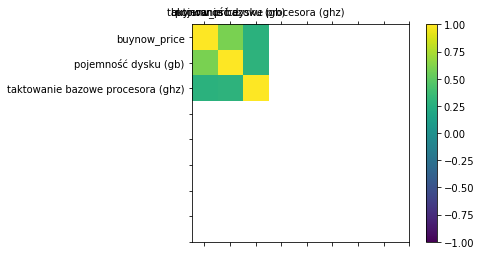

In [131]:
#Korelacje
names = ['buynow_price', 'pojemność dysku (gb)', 'taktowanie bazowe procesora (ghz)']
correlations = data_public.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()


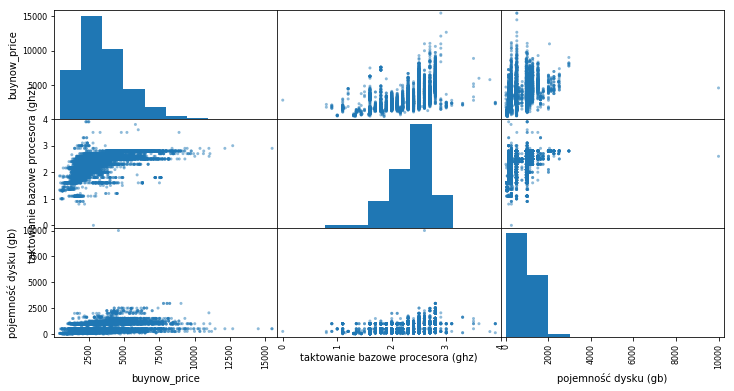

In [199]:
#Scatter matrix


scatter_matrix(data_public)
plt.show()

In [244]:
#Czesc zmiennych odrzucona po analizie opisowej
labels = ['liczba rdzeni procesora', 'wielkość pamięci ram',
               'pojemność dysku (gb)']
categories

['rodzaj karty graficznej',
 'rozdzielczość (piksele)',
 'liczba rdzeni procesora',
 'wielkość pamięci ram',
 'typ dysku twardego',
 'typ pamięci ram',
 'taktowanie bazowe procesora (ghz)',
 'stan',
 'pojemność dysku (gb)',
 'wielkość matrycy']

,liczba rdzeni procesora,wielkość pamięci ram,taktowanie bazowe procesora (ghz),pojemność dysku (gb)
0,4,12,2.60,480.0
10,4,4,2.20,1000.0
100,2,12,2.30,1240.0
1000,2,2,1.60,128.0
10000,2,8,2.70,256.0
10009,2,8,2.70,1000.0
10010,4,8,2.90,256.0
10013,4,12,2.50,256.0
10015,2,12,2.50,256.0
10017,4,16,2.30,240.0


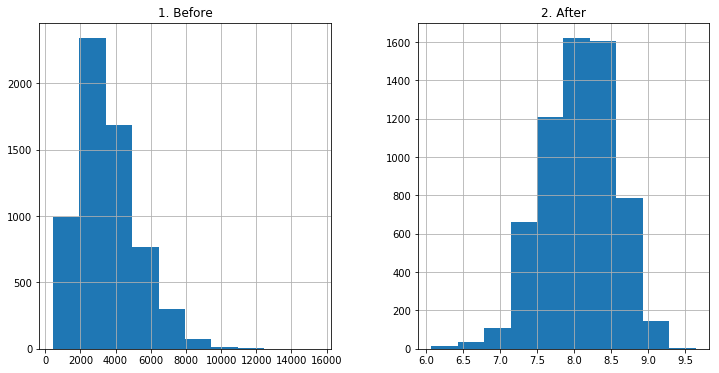

In [283]:
#Preprocessowanie danych
Y = data_public['buynow_price']
X = data_public.drop(['buynow_price'], axis='columns', inplace=False)
X1 = data_public[labels]
X2 = data_public[cat1]
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"1. Before":Y, "2. After":np.log1p(Y)})
prices.hist()

Y = np.log1p(Y)
X1 = X1.replace('None', 0)
X2 = X2.replace('None', 0)
X2

In [286]:
#Import istotnnych funkcji oraz podział na zbiór testowy oraz treningowy
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, train_test_split


def cv_rmse(model, x, y):
    r = np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5))
    return r

# Procent uzywanych danych na trening
test_size = .2

#Podzial na zbior treningowy i walidacyjny
X1_train, X1_test, y_train, y_test = train_test_split(X1, Y, test_size=test_size, random_state = 3)
print(X1_train.shape, X1_test.shape, y_train.shape, y_test.shape)
X2_train, X2_test, y_train, y_test = train_test_split(X2, Y, test_size=test_size, random_state = 3)



(4950, 3) (1238, 3) (4950,) (1238,)


In [287]:
X2

,liczba rdzeni procesora,wielkość pamięci ram,taktowanie bazowe procesora (ghz),pojemność dysku (gb)
0,4,12,2.60,480.0
10,4,4,2.20,1000.0
100,2,12,2.30,1240.0
1000,2,2,1.60,128.0
10000,2,8,2.70,256.0
10009,2,8,2.70,1000.0
10010,4,8,2.90,256.0
10013,4,12,2.50,256.0
10015,2,12,2.50,256.0
10017,4,16,2.30,240.0


In [228]:
# Tworzenie regressora liniowego
regr = linear_model.LinearRegression()
# Trenowanie modelu
regr.fit(X1_train, y_train)

# Predykcja
y_pred = regr.predict(X1_test)

# Wspolczynniki
print('Coefficients: \n', regr.coef_)
# Bład sredniokwadratowy
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Score 
print('Variance score: %.2f' % r2_score(y_test, y_pred))



Coefficients: 
 [1.40508472e-01 3.11758755e-02 1.03077185e-04]
Mean squared error: 0.14
Variance score: 0.39


In [279]:

# Evaluate using Cross Validation

from sklearn import model_selection
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = linear_model.LinearRegression()
results = model_selection.cross_val_score(model, X1, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 39.581% (3.576%)


In [233]:
#Metoda wektorów nośnych (SVM)
#Tworzenie regressora SVM
model = svm.SVR( C=1, epsilon = 0.2) 
#Proces modelowania

model.fit(X1_train, y_train)
model.score(X1_train, y_train)
#Predict Output
predicted= model.predict(X1_test)

In [236]:
#Lepszy score niz przy zwyklej regresji
model.score(X1_train, y_train)

array([8.33399867, 8.64253973, 8.56667237, ..., 8.08199389, 7.7121663 ,
       8.13941936])

In [280]:

# Evaluate using Cross Validation

from sklearn import model_selection
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = svm.SVR()
results = model_selection.cross_val_score(model, X1, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 64.026% (2.988%)


In [273]:
#Preprocessing for NB
import nltk  
nltk.download()
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
X2['rodzaj karty graficznej'] = X2['rodzaj karty graficznej'].apply(nltk.word_tokenize)  

stemmer = PorterStemmer()

X2['rodzaj karty graficznej'] = X2['rodzaj karty graficznej'].apply(lambda x: [stemmer.stem(y) for y in x])  


# Konwertuje liste slow w odseparowane stringi
X2['rodzaj karty graficznej'] = X2['rodzaj karty graficznej'].apply(lambda x: ' '.join(x))

count_vect = CountVectorizer()  
counts = count_vect.fit_transform(X2['rodzaj karty graficznej'])  

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


KeyboardInterrupt: 

In [ ]:
X2['typ dysku twardego'] = X2['typ dysku twardego'].apply(nltk.word_tokenize)  

stemmer = PorterStemmer()

X2['typ dysku twardego'] = X2['typ dysku twardego'].apply(lambda x: [stemmer.stem(y) for y in x])  


# Konwertuje liste slow w odseparowane stringi
X2['typ dysku twardego'] = X2['typ dysku twardego'].apply(lambda x: ' '.join(x))

count_vect = CountVectorizer()  
counts = count_vect.fit_transform(X2['typ dysku twardego'])  

In [ ]:


from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer().fit(counts)

counts = transformer.transform(counts)  

In [295]:
# Naiwny Bayes
y_train = y_train.astype('int')
y_test = y_test.astype('int')
from sklearn.naive_bayes import MultinomialNB, GaussianNB

model = GaussianNB().fit(X2_train, y_train)  

In [296]:
import numpy as np

predicted = model.predict(X2_test)

print(np.mean(predicted == y_test)) 

0.7423263327948304


In [297]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predicted))  

[[ 14   5   0   0]
 [ 14 409  49   0]
 [  1 219 493  17]
 [  0   2  12   3]]


In [302]:
# Evaluate using Cross Validation

from sklearn import model_selection
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GaussianNB()
results = model_selection.cross_val_score(model, X2, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 75.495% (1.719%)


In [305]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(4, 2), random_state=1)

clf.fit(X2_train, y_train) 
clf.predict(X2_test)

TypeError: predict() takes 2 positional arguments but 3 were given

In [307]:
# Evaluate using Cross Validation

from sklearn import model_selection
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model =MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(4, 2), random_state=1)
results = model_selection.cross_val_score(model, X2, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 55.591% (1.859%)


In [ ]:
#Wybieram GaussianNB do predykcji najwyzsze accuracy

In [351]:
# Naiwny Bayes
y_train = y_train.astype('int')
y_test = y_test.astype('int')
from sklearn.naive_bayes import MultinomialNB, GaussianNB

model = GaussianNB().fit(X2_train, y_train)  
prediction =pd.DataFrame(model.predict(data_hidden))
ac1 = pd.concat([prediction, data_hidden], axis =1)

In [354]:
ac1.to_json(orient = 'columns')

'{"0":{"0":7.0,"1":7.0,"2":6.0,"3":8.0,"4":7.0,"5":8.0,"6":6.0,"7":7.0,"8":7.0,"9":8.0,"10":7.0,"11":7.0,"12":7.0,"13":8.0,"14":7.0,"15":8.0,"16":7.0,"17":7.0,"18":7.0,"19":7.0,"20":7.0,"21":7.0,"22":8.0,"23":8.0,"24":7.0,"25":8.0,"26":7.0,"27":7.0,"28":7.0,"29":8.0,"30":7.0,"31":7.0,"32":7.0,"33":8.0,"34":7.0,"35":7.0,"36":8.0,"37":8.0,"38":7.0,"39":8.0,"40":8.0,"41":7.0,"42":8.0,"43":8.0,"44":7.0,"45":8.0,"46":8.0,"47":7.0,"48":8.0,"49":7.0,"50":7.0,"51":8.0,"52":8.0,"53":7.0,"54":8.0,"55":7.0,"56":8.0,"57":7.0,"58":8.0,"59":7.0,"60":7.0,"61":8.0,"62":8.0,"63":7.0,"64":8.0,"65":7.0,"66":7.0,"67":7.0,"68":8.0,"69":7.0,"70":7.0,"71":7.0,"72":8.0,"73":7.0,"74":7.0,"75":8.0,"76":8.0,"77":7.0,"78":7.0,"79":9.0,"80":8.0,"81":7.0,"82":7.0,"83":8.0,"84":8.0,"85":8.0,"86":7.0,"87":8.0,"88":7.0,"89":7.0,"90":7.0,"91":7.0,"92":7.0,"93":7.0,"94":7.0,"95":9.0,"96":7.0,"97":7.0,"98":8.0,"99":7.0,"100":8.0,"101":7.0,"102":7.0,"103":7.0,"104":7.0,"105":7.0,"106":7.0,"107":8.0,"108":7.0,"109":8.0,"11

In [352]:
ac1.write.json("C:/Users/Wietczak/Desktop/Dane do wysłania/test.JSON")

AttributeError: 'str' object has no attribute 'ac1'